In [1]:
# NEED TO USE TADA_V2 kernel to be able to load the modles
import numpy as np
import pandas as pd
import tensorflow as tf # tested on version 2.2.0
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['font.sans-serif'] = 'Arial'
from matplotlib import pyplot as plt
from joblib import load
from scipy.stats import spearmanr
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import auc
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec


import os

from Model import ADModel_three_state, ADModel_three_state_abund, ADModel_two_state, ADModel_two_state_abund, ADModel_act, ADModel_abund
from Data import DataReader, SplitData, FastTensorDataLoader

In [8]:
all_results[" activity_fun"]

0         Hill
1         Hill
2         Hill
3         Hill
4         Hill
         ...  
2031    Linear
2032    Linear
2033    Linear
2034    Linear
2035    Linear
Name:  activity_fun, Length: 2036, dtype: object

/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_90088/1703411144.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_two_state_linear["abund_kernel_size"] = [re.search(pattern, name).group(1) for name in data_two_state_linear["model_name"]]
/var/folders/1z/f_dq1cxs02n4k3c48p54y62w0000gn/T/ipykernel_90088/1703411144.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_three_state_linear["abund_kernel_size"] = [re.search(pattern, name).group(1) for name in data_three_state_linear["model_

Text(0.5, 1.0, 'Three state biophysical NN')

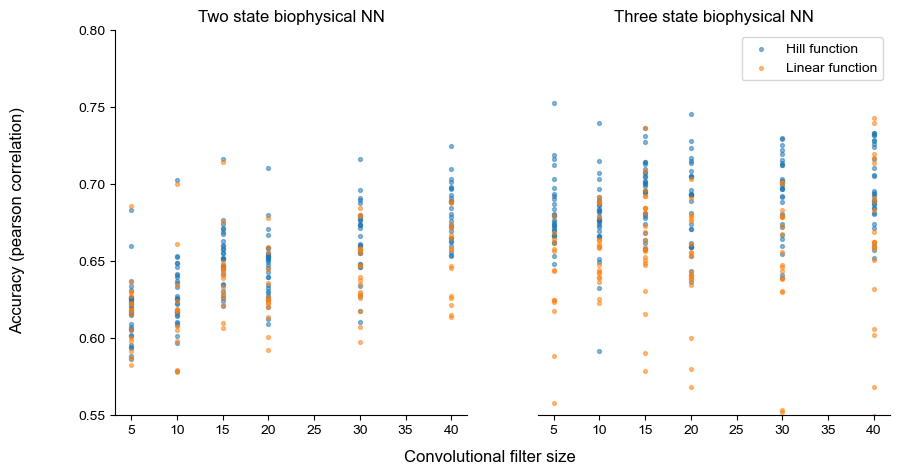

In [23]:
import re
data_two_state = pd.read_csv("../results/results_2_state_w0.5_repeats.csv")
data_three_state = pd.read_csv("../results/results_3_state_repeats.csv")

all_results = pd.read_csv("../results/results.csv")
data_two_state_linear = all_results[(all_results[" activity_fun"] == "Linear") & (all_results[" model_type"] == "two_state_abund")]
data_three_state_linear = all_results[(all_results[" activity_fun"] == "Linear") & (all_results[" model_type"] == "three_state_abund")]

fig, axs = plt.subplots(1,2, figsize = (10,5), sharex=True, sharey=True)

pattern = r"_ak(\d+)_"
data_two_state["abund_kernel_size"] = [re.search(pattern, name).group(1) for name in data_two_state["model_name"]]
axs[0].scatter(data_two_state[" kernel_size"], data_two_state["Rs1_act_val"], label="Hill function", s=8, alpha=0.5)

data_three_state["abund_kernel_size"] = [re.search(pattern, name).group(1) for name in data_three_state["model_name"]]
axs[1].scatter(data_three_state[" kernel_size"], data_three_state["Rs1_act_val"], label="Hill function", s=8, alpha=0.5)

data_two_state_linear["abund_kernel_size"] = [re.search(pattern, name).group(1) for name in data_two_state_linear["model_name"]]
axs[0].scatter(data_two_state_linear[" kernel_size"], data_two_state_linear["Rs1_act_val"], label="Linear function", s=8, alpha=0.5)

data_three_state_linear["abund_kernel_size"] = [re.search(pattern, name).group(1) for name in data_three_state_linear["model_name"]]
axs[1].scatter(data_three_state_linear[" kernel_size"], data_three_state_linear["Rs1_act_val"], label="Linear function", s=8, alpha=0.5)


fig.supxlabel("Convolutional filter size")
fig.supylabel("Accuracy (pearson correlation)")

plt.legend()
plt.ylim(0.55, 0.8)

axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].spines["left"].set_visible(False)

axs[1].yaxis.set_tick_params(size=0)

axs[0].set_title("Two state biophysical NN")
axs[1].set_title("Three state biophysical NN")